In [1]:
import numpy as np
import scipy as sp
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
# Import custom modules
import CCM_GAH_lib as ccm

## Generate artificial data

Use the gollowing coupled equations:

$X(t+1) = X(t)[r_x - r_x X(t) - \beta_{x,y}Y(t)]$ <br>
$Y(t+1) = Y(t)[r_y - r_y Y(t) - \beta_{y,x}X(t)]$ <br>
<br>
with $r_x = 3.8$, $r_y = 3.5$, $\beta_{x,y} = 0.02$, and $\beta_{y_x} = 0.1$, so that the effect of X on Y is stronger.

In [2]:
def f_x (f_x_prev, f_y_prev):
    return f_x_prev*(3.8 - 3.8*f_x_prev - 0.02*f_y_prev)

def f_y (f_x_prev, f_y_prev):
    return f_y_prev*(3.5 - 3.5*f_y_prev - 0.1*f_x_prev)

time_max = 4000
t = np.arange(time_max)
X = np.zeros(time_max)
X[0] = 0.4 # from supplementary materials
Y = np.zeros(time_max)
Y[0] = 0.2 # from supplementary materials

for i in range(time_max-1):
    X[i+1] = f_x(X[i], Y[i])
    Y[i+1] = f_y(X[i], Y[i])

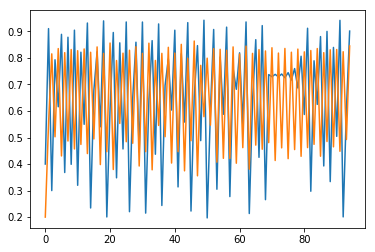

In [3]:
plt.plot(t[0:95], X[0:95])
plt.plot(t[0:95], Y[0:95])
plt.show()

In [4]:
%%time

E = 3
time_max = 3000
L = np.arange(E+17, time_max, 100, dtype=int)

corr_X_xmap_Y = []
corr_Y_xmap_X = []
corr_Y_xmap_X_1 = []

for i in L:
    print("I am here %s" %(i))
          
    X_approx = ccm.generateYApprox(Y[:i], X[:i], E=E, how_long=0)  
    corr_X_xmap_Y.append(pearsonr(X[(E-1):i], X_approx)[0])
        
    Y_approx = ccm.generateYApprox(X[:i], Y[:i], E=E, how_long=0)  
    corr_Y_xmap_X.append(pearsonr(Y[(E-1):i], Y_approx)[0])  

I am here 20
I am here 120
I am here 220
I am here 320
I am here 420
I am here 520
I am here 620
I am here 720
I am here 820
I am here 920
I am here 1020
I am here 1120
I am here 1220
I am here 1320
I am here 1420
I am here 1520
I am here 1620
I am here 1720
I am here 1820
I am here 1920
I am here 2020
I am here 2120
I am here 2220
I am here 2320
I am here 2420
I am here 2520
I am here 2620
I am here 2720
I am here 2820
I am here 2920
Wall time: 44min 7s


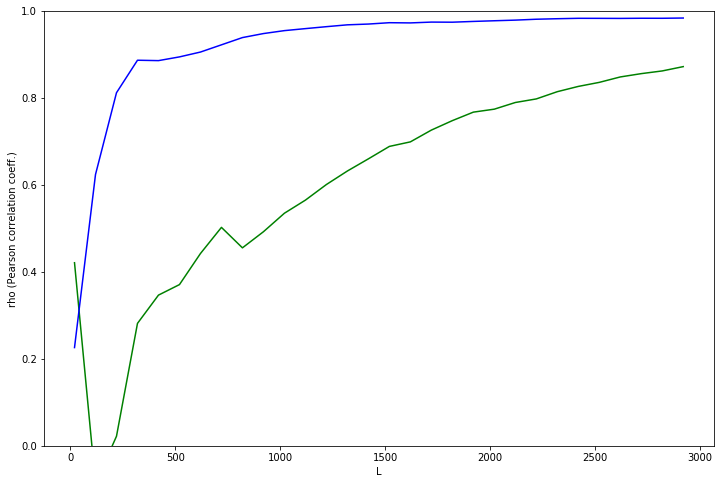

In [5]:
fig = plt.figure(figsize=(12,8))
plt.plot(L, corr_Y_xmap_X, 'g')
plt.plot(L, corr_X_xmap_Y, 'b')
plt.ylim([0,1])
plt.xlabel("L")
plt.ylabel("rho (Pearson correlation coeff.)")
plt.show()